In [43]:
'''
Creating to run Model D Conv1d_mfcc40
different layer system
full mfcc features
Created on 2020.12.08 at 1843

'''
# libraries
import numpy as np
import pickle
import tensorflow as tf

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import AveragePooling1D, GlobalAveragePooling2D, MaxPooling1D
from tensorflow.keras.models import Model, model_from_json, Sequential

# added this to plot
import matplotlib.pyplot as plt

In [44]:
# load datasets

# assigning the pickle files
with open('./Data_Array_Storage/X_train_mfcc40_axis0.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('./Data_Array_Storage/X_test_mfcc40_axis0.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('./Data_Array_Storage/y_train_mfcc40_axis0.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('./Data_Array_Storage/y_test_mfcc40_axis0.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
print('dataset loaded')

dataset loaded


In [45]:
# input shape
input_shape = (X_train.shape[1], X_train.shape[2])
print(input_shape)

(216, 40)


In [50]:
def emo1d(input_shape, num_classes,args):
    
    learning_rate = 0.0001
    decay = 1e-6
    momentum = 0.9
    num_class=3
    num_fc = 64
    
    model = Sequential(name='Emo1D')
    
    # LFLB1
    model.add(Conv1D(filters = 64,kernel_size = (3),strides=1,padding='same',data_format='channels_last',input_shape=input_shape))	
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling1D(pool_size = 4, strides = 4))

    #LFLB2
    model.add(Conv1D(filters=64, kernel_size = 3, strides=1,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling1D(pool_size = 4, strides = 4))

    #LFLB3
    model.add(Conv1D(filters=128, kernel_size = 3, strides=1,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling1D(pool_size = 4, strides = 4))

    #LFLB4
    model.add(Conv1D(filters=128, kernel_size = 3, strides=1,padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling1D(pool_size = 4, strides = 4))

    #LSTM
    model.add(LSTM(units=num_fc)) 

    #FC
    model.add(Dense(units=num_classes,activation='softmax'))

    #Model compilation	
    opt = optimizers.SGD(lr = learning_rate, decay=decay, momentum=momentum, nesterov=True)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['categorical_accuracy'])

    return model

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 216, 32)           3872      
_________________________________________________________________
activation_26 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 216, 32)           3104      
_________________________________________________________________
batch_normalization_6 (Batch (None, 216, 32)           128       
_________________________________________________________________
activation_27 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 216, 32)           0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 72, 32)           

In [36]:
def model_d_conv1d(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 3, padding='same',input_shape=input_shape))  # X_train.shape[1] = No. of Columns (216)
    model.add(Activation('relu'))
    model.add(Conv1D(32, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3))) # added drop out and maxpooling layer on 20201209 at 1330
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(3)))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(256, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(3)) # Target class number
    model.add(Activation('softmax'))
    
    # model optimizer
#     model = model_d_conv1d(input_shape)
    optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)
    
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    return model

model.summary()

In [37]:
# load model and input shape
# from models import model_d_conv1d

# model = model_d_conv1d(input_shape)
# optimizer = tf.keras.optimizers.RMSprop(lr=0.000001, decay=1e-6)

# print('input shape, model, optimizer loaded')

# model.summary()

input shape, model, optimizer loaded
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 216, 32)           3872      
_________________________________________________________________
activation_26 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 216, 32)           3104      
_________________________________________________________________
batch_normalization_6 (Batch (None, 216, 32)           128       
_________________________________________________________________
activation_27 (Activation)   (None, 216, 32)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 216, 32)           0         
_________________________________________________________________
max_pooling1d_7 (

In [47]:
# callback list: ModelCheckpoint, reduceLROnPlat, EarlyStopping
# checkpoint_path = "./models_saved/model_d_conv1d_v3.h5"

checkpoint_path = "./models_saved/model_e_emo1d_v2.h5"

# Create a callback that saves the model's weights
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 save_best_only=True,
                                                 verbose=1, # 1 tells your which epoch is saving
#                                                  monitor='val_categorical_accuracy',  # added for emo1d
                                                 mode='max'), # added for emo1d
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', # changed from 'val_accuracy'
                                                patience=5, 
                                                restore_best_weights=True,
                                                verbose = 1, # added verbose for emo1d
                                                mode = 'min'), # added for emo1d
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                    patience=2, 
                                                    factor=0.5, 
                                                    min_lr=0.000001, 
                                                    verbose=1)]

print('callbacks and checkpoints set')

callbacks and checkpoints set


In [39]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

# print('model compiled')

model compiled


In [51]:
batch_size = 64

model_history=model.fit(X_train, 
                        y_train,
                        batch_size=batch_size,
                        epochs=150,
                        validation_data=(X_test, y_test),
                        verbose=2,
                        callbacks=callbacks)

Epoch 1/150
305/305 - 10s - loss: 0.7984 - accuracy: 0.6883 - val_loss: 0.8656 - val_accuracy: 0.6826
Epoch 2/150
305/305 - 10s - loss: 0.7947 - accuracy: 0.6922 - val_loss: 0.8667 - val_accuracy: 0.6826
Epoch 3/150
305/305 - 10s - loss: 0.7901 - accuracy: 0.6936 - val_loss: 0.8655 - val_accuracy: 0.6826
Epoch 4/150
305/305 - 11s - loss: 0.7867 - accuracy: 0.6960 - val_loss: 0.8666 - val_accuracy: 0.6826
Epoch 5/150
305/305 - 10s - loss: 0.7828 - accuracy: 0.6980 - val_loss: 0.8656 - val_accuracy: 0.6826
Epoch 6/150
305/305 - 11s - loss: 0.7802 - accuracy: 0.7007 - val_loss: 0.8658 - val_accuracy: 0.6826
Epoch 7/150
305/305 - 11s - loss: 0.7781 - accuracy: 0.7017 - val_loss: 0.8653 - val_accuracy: 0.6826
Epoch 8/150
305/305 - 10s - loss: 0.7735 - accuracy: 0.7016 - val_loss: 0.8667 - val_accuracy: 0.6824
Epoch 9/150
305/305 - 10s - loss: 0.7705 - accuracy: 0.7020 - val_loss: 0.8657 - val_accuracy: 0.6824
Epoch 10/150
305/305 - 11s - loss: 0.7689 - accuracy: 0.7042 - val_loss: 0.8649 - 

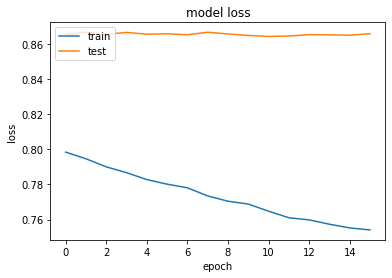

In [52]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
score,acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

77/77 - 0s - loss: 0.9548 - accuracy: 0.6828
score: 0.95
acc: 0.68
